In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import random_projection
import neurokit2 as nk
import cccrt
from IPython.display import Audio
import librosa
import librosa.display

/home/ck84/miniconda3/envs/conda39/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
def project(x, grproj, projDims):
    hop=int(projDims/1)
    offsets=arange(0,len(x)-projDims+1,hop)
    res = zeros((len(offsets),grproj.n_components))
    idx=0
    for i in  offsets:
        val = array([x[i:i+projDims]])
        prj = grproj.transform(val)
        res[idx] = prj
        idx=idx+1
        # print(val, prj, res[i])
    return res

def rpc(v, rp, dims, bincount):
    prj = project(v, rp, dims)
    return pow(sum(minimum(histogramdd(prj, bins=bincount)[0],1)) / (pow(bincount, rp.n_components)), 1/rp.n_components)

def rpc1d(v, rp, dims, bincount):
    prj = project(v, rp, dims)
    histdata =histogram(prj.flatten(), bins=bincount)[0]
    return sum(histdata> 0) / bincount


def rpcMean(v, rp, dims, bincount):
    prj = project(v, rp, dims)
    hist = histogramdd(prj, bins=bincount)[0]
    mn = mean(hist)
    return sum(hist > mn ) / (pow(bincount, rp.n_components))

def quantise(v, symcount):
    return array(v/np.max(v) * symcount, dtype=int)

quantise(arange(0,1,0.1),5)

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 5])

In [4]:
def runFeatureOnWindows(sig, winsize, hopsize, feature):
    offset=0
    res = []
    while offset + winsize < len(sig):
        feat = feature(sig[offset:offset+winsize])
        res.append(feat)
        # print(offset / len(sig), ": ", feat)
        offset += hopsize
    return res

        


In [5]:
#projection examples for the paper

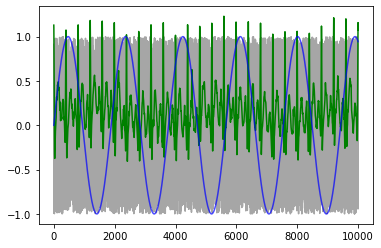

In [6]:
wnoise = (random.random(10000) * 2) - 1
plot(wnoise, alpha=0.7, color='grey')
ecg = nk.ecg_simulate(duration=10, noise=0.1, heart_rate=150)
f1 = plot(ecg, color='green')
wsin = (np.sin(arange(10000)/300))
plot(wsin, color='blue', alpha=0.7)


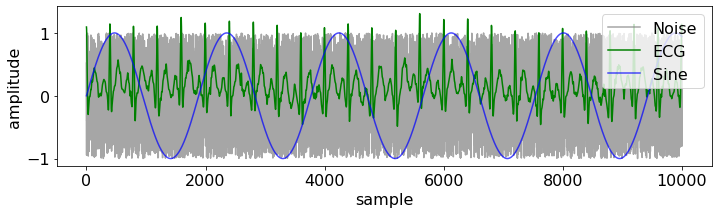

In [523]:
matplotlib.rcParams.update({'font.size': 16})
plot(wnoise, alpha=0.7, color='grey', label="Noise")
plot(ecg, color='green', label="ECG")
plot(wsin, color='blue', alpha=0.7, label="Sine")
plt.tight_layout()
xlabel("sample")
ylabel("amplitude")
plt.legend()
plt.savefig("waves.pdf")


69.0 91.0 212.0


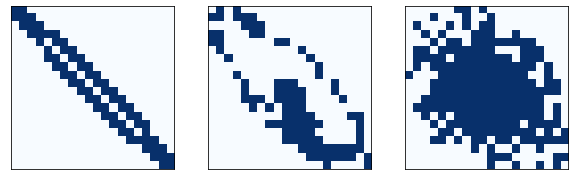

In [499]:
def calcRPC(win): 
    prj = project(win, calcRPC.rp, calcRPC.rpsize)
    histo = minimum(histogramdd(prj, bins=20)[0],1)
    return histo
    # return rpc(win, calcRPC.rp, calcRPC.rpsize, 10) 

calcRPC.rp = random_projection.GaussianRandomProjection(n_components=2)  
calcRPC.rpsize=16
calcRPC.rp.fit(np.random.random((calcRPC.rpsize, calcRPC.rpsize)))
figsize(10,3)
rcParams["image.cmap"] = 'Blues'

hsin =calcRPC(wsin)
hecg =calcRPC(ecg)
hnoise =calcRPC(wnoise)

print(sum(hsin), sum(hecg), sum(hnoise))




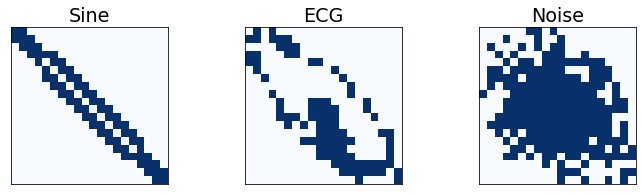

In [521]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
# fig.suptitle('2D Projections')
f1 = ax1.imshow(hsin)
f2 = ax2.imshow(hecg)
f3 = ax3.imshow(hnoise)
ax1.title.set_text("Sine")
ax2.title.set_text("ECG")
ax3.title.set_text("Noise")

for f in [f1,f2,f3]:
    f.axes.get_xaxis().set_visible(False)
    f.axes.get_yaxis().set_visible(False)

plt.savefig("2dProjections.pdf")
plt.tight_layout()